In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/package/placement (3).csv


In [2]:
#load the dataset
df = pd.read_csv('/kaggle/input/package/placement (3).csv')

In [3]:
#view the first 5 records of the dataset
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


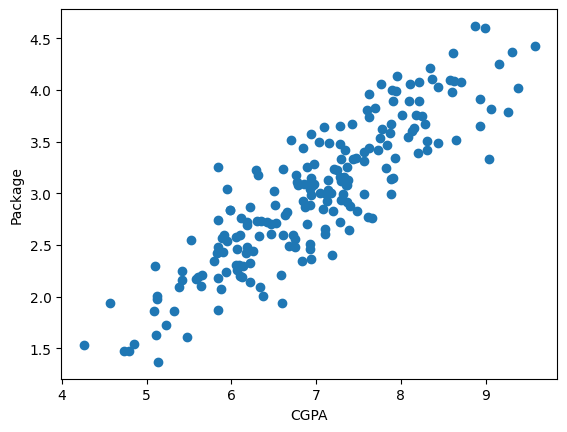

In [4]:
#scatter plot to see the distribution of data
import matplotlib.pyplot as plt

plt.scatter(x=df['cgpa'],y=df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.show()

In [5]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [8]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

In [9]:
m = lr.coef_
m

array([0.55795197])

In [10]:
b = lr.intercept_
b

-0.8961119222429144

In [11]:
# y = mx + b
m * 6.89 + b

array([2.94817717])

## Linear Regression Coding from Scratch

## Y = mX + b  
## m = Σ [ (xi – x)(yi – y) ] / Σ [(xi – x)2]

- xi = X_train
- X = X_train.mean()
- yi = y_train
- y = y_train.mean()

In [12]:
class LR:
    def __init__(self):
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        num = 0
        den = 0

        for i in range(X_train.shape[0]):
            num = num + ((X_train[i] - X_train.mean()) * ((y_train[i] - y_train.mean())))

            den = den +((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))
        
        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)

    def predict(self, X_test):
        # y = mx+b
        return self.m * X_test + self.b


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

lr1 = LR()

In [14]:
X = df.iloc[:,0:1].values
y = df.iloc[:,-1].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
X_train.mean()

7.04725

In [17]:
lr1.fit(X_train,y_train)

[0.57633042]
[-1.02960704]


In [18]:
lr1.predict(X_test[0])

array([2.97012606])